# Problem statement

Prepare a model for glass classification using KNN

# Importing the libraries

In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Loading the dataset

In [2]:
glass = pd.read_csv("../input/glass/glass.csv")

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


We can just peek into few data points by using head function of pandas. By default, head function return top 5 values 

# Data Insights

In [4]:
glass.shape

(214, 10)

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
dups = glass.duplicated()
print('Number of duplicate rows: %d' % dups.sum())

Number of duplicate rows: 1


There is one duplicate row, we will delete the duplicate row.

In [7]:
print('Number of rows before discarding duplicates = %d' % glass.shape[0])

glass = glass.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % glass.shape[0])

Number of rows before discarding duplicates = 214
Number of rows after discarding duplicates = 213


# Summary statistics

In [8]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Observations :-

1. We could see there is a lot of difference between 50% (percentile) value and the max value for K(Potassium) and Ca(Calcium). So there is a chance of having an outlier in these 2 columns. We will further check using boxplots
2. We can see the min,max and standard deviations including 25,50 and 75 percentile values.

# Understanding the target variable

##### Our main objective is to classify the type of glass based on weight percentage. We have a column Type which has the values from 1 to 7 which is to determine the glass type



##### value_counts() method shows how many samples it is for the glass type. 

In [9]:
glass['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

##### We can see the most frequent type of glasses are type 2 and type 1 in our data with the maximum value of 76 and 70. We can see the value counts of all the types. The data is imbalanced. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.

<AxesSubplot:xlabel='Type', ylabel='count'>

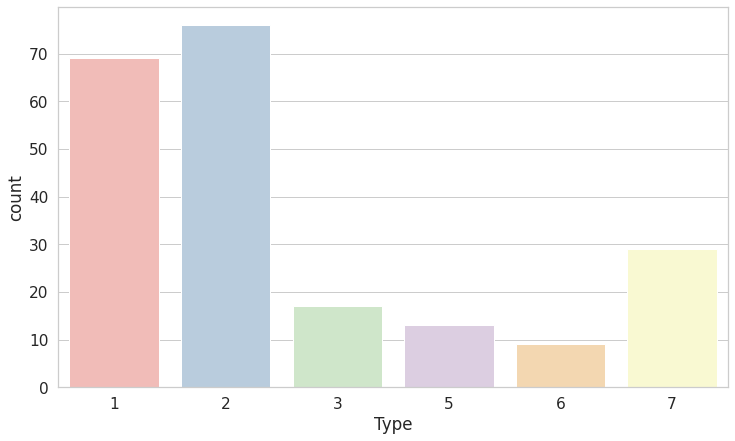

In [10]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'Type', data = glass, palette = 'Pastel1')

# Data visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RI'>

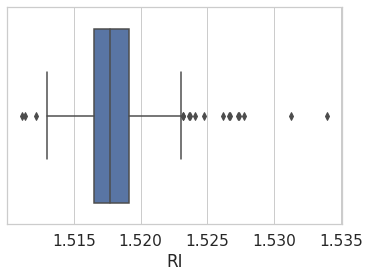

In [11]:
sn.boxplot(glass['RI'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Na'>

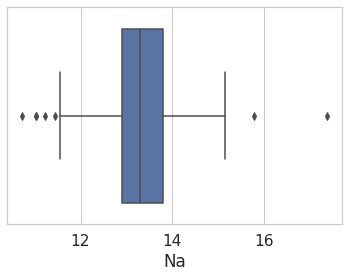

In [12]:
sn.boxplot(glass['Na'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Mg'>

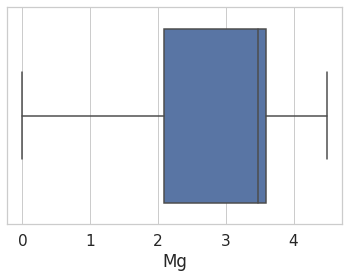

In [13]:
sn.boxplot(glass['Mg'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Al'>

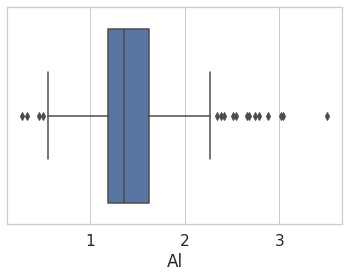

In [14]:
sn.boxplot(glass['Al'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Si'>

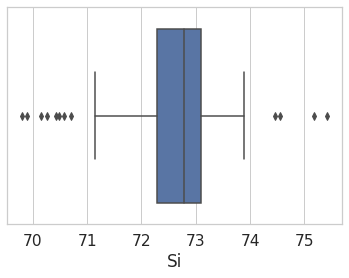

In [15]:
sn.boxplot(glass['Si'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='K'>

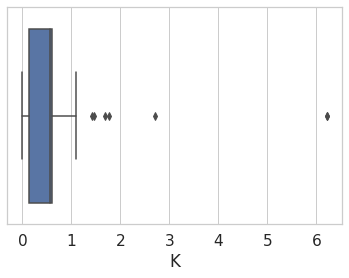

In [16]:
sn.boxplot(glass['K'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ca'>

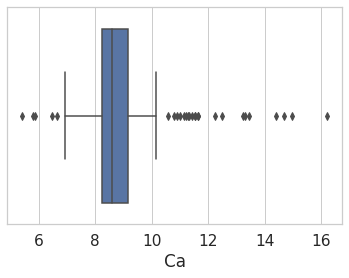

In [17]:
sn.boxplot(glass['Ca'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ba'>

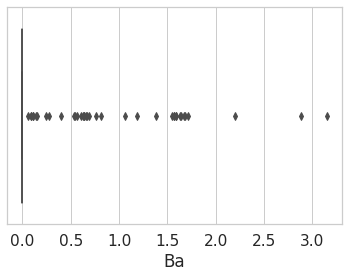

In [18]:
sn.boxplot(glass['Ba'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fe'>

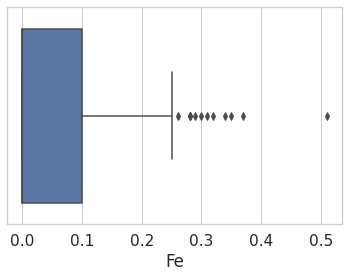

In [19]:
sn.boxplot(glass['Fe'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Type'>

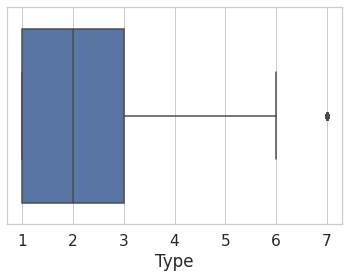

In [20]:
sn.boxplot(glass['Type'])

### Observations :-

1. We can see there are outliers in all the columns except Mg. The Type column is also having outlier as we already saw the value counts are very less for type 7
2. The median line for Mg and K is towards the upper quartile which means the data is skewed.We will check the distplots and confirm the same.

### Distplots

Dist plots are used to check the distribution of the data, peak value(the observation having the highest frequecy) and check for skewness in the data

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RI', ylabel='Density'>

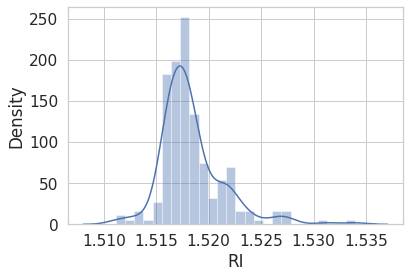

In [21]:
sn.distplot(glass['RI'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na', ylabel='Density'>

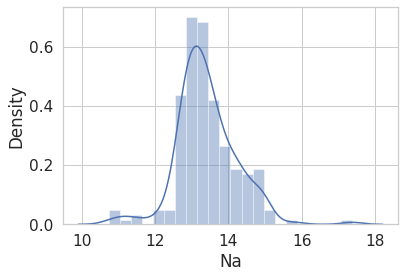

In [22]:
sn.distplot(glass['Na'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mg', ylabel='Density'>

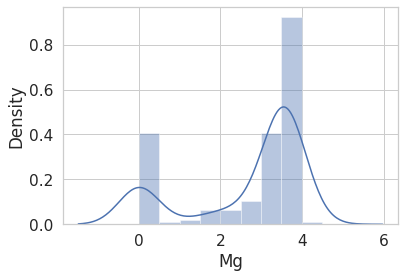

In [23]:
sn.distplot(glass['Mg'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Al', ylabel='Density'>

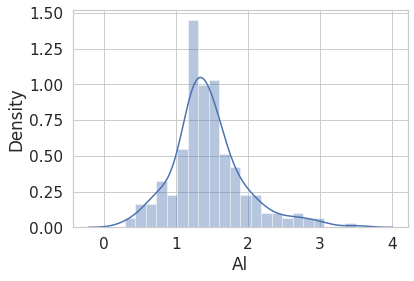

In [24]:
sn.distplot(glass['Al'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Si', ylabel='Density'>

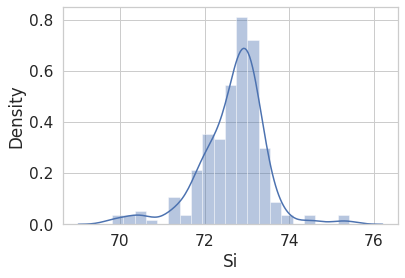

In [25]:
sn.distplot(glass['Si'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='K', ylabel='Density'>

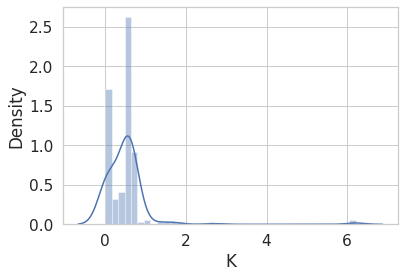

In [26]:
sn.distplot(glass['K'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ca', ylabel='Density'>

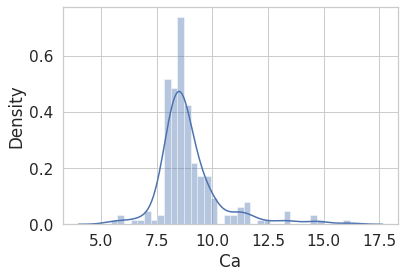

In [27]:
sn.distplot(glass['Ca'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ba', ylabel='Density'>

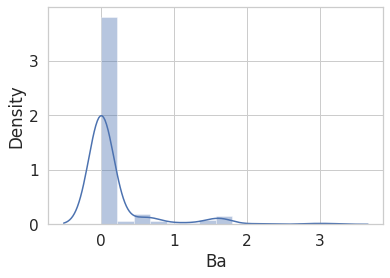

In [28]:
sn.distplot(glass['Ba'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fe', ylabel='Density'>

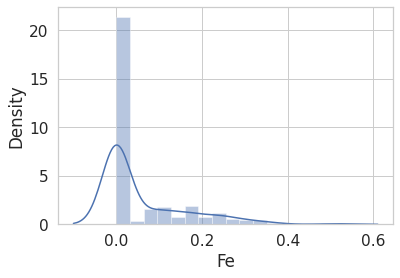

In [29]:
sn.distplot(glass['Fe'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type', ylabel='Density'>

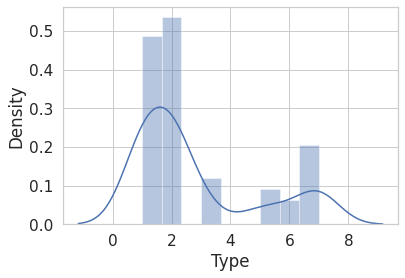

In [30]:
sn.distplot(glass['Type'])

### Observations :-

1. There is very high positive skewness in RI, Na, Al, K, Ca, Ba, Fe and Type
2. There is negative skewness in Mg and Si

# Heatmap

##### Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

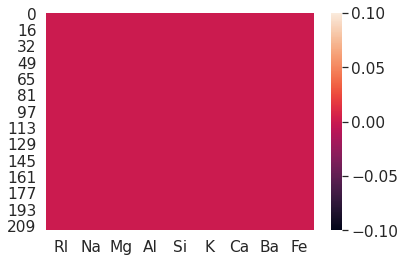

In [31]:
Y = 'Type'
X = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


sn.heatmap(glass[X].isnull())

### Observations :-

1. We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background. 

<AxesSubplot:>

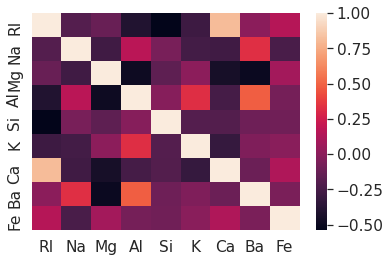

In [32]:
sn.heatmap(glass[X].corr())

In [33]:
glass[X].corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


# Separating feature data and Label data  and train-test split

In [34]:
X = pd.DataFrame(glass.drop(["Type"], axis = 1),
            columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
Y = glass.Type

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 30, stratify = Y)


In [35]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00
53,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00
...,...,...,...,...,...,...,...,...,...
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22


In [36]:
Y_train

145    2
14     1
178    6
53     1
49     1
      ..
75     2
197    7
159    3
32     1
204    7
Name: Type, Length: 170, dtype: int64

In [37]:
X_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00
89,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.00
81,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00
128,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00


In [38]:
Y_test

179    6
42     1
89     2
37     1
81     2
193    7
60     1
128    2
188    7
155    3
7      1
189    7
198    7
153    3
99     2
47     1
175    5
12     1
3      1
87     2
79     2
2      1
69     1
184    6
98     2
101    2
93     2
80     2
115    2
140    2
148    3
125    2
169    5
168    5
46     1
23     1
54     1
17     1
114    2
67     1
118    2
210    7
192    7
Name: Type, dtype: int64

# Grid Search for Algorithm Tuning

In [39]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [40]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [41]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'n_neighbors': 1}


##### After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm

### Visualizing the CV results

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class

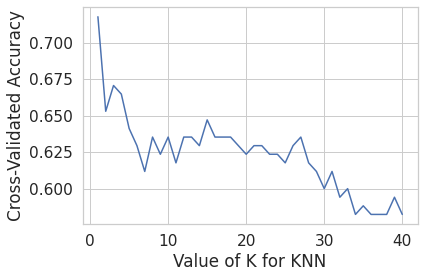

In [42]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

##### We could see that the model accuracy is very good for k values smaller than 5 and as the value increases the accuracy goes on decreasing

# Using KNN Classifier for prediction

In [43]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.7441860465116279


##### We can see that the accuracy score which we have got for our model is 0.76 which is 76%. It is decent accuracy score. But the accuracy score can be misleading for imbalanced data. So we will use confusion matrix and classification report metrics further

In [44]:
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[ 9  1  4  0  0  0]
 [ 2 13  0  0  0  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  1  4]]


In [45]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.64      0.67        14
           2       0.87      0.87      0.87        15
           3       0.20      0.33      0.25         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         6

    accuracy                           0.74        43
   macro avg       0.74      0.75      0.73        43
weighted avg       0.78      0.74      0.76        43



##### The precison,recall and f1 score for type 3 is very low. For type 1, the precison is low but recall and f1-score is good. Since the data is imbalanced, we can see the precision,recall values are affected. We will use oversamping technique as the data is very less and undersampling will cause data loss

# Using Over Sampling for balancing the data

##### We will use SMOTE over sampling technique for oversampling the data

In [46]:
sm = SMOTE(sampling_strategy = 'not majority', random_state = 42)

In [47]:
x_resample, y_resample = sm.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [48]:
y_df.value_counts()

Type
1       76
2       76
3       76
5       76
6       76
7       76
dtype: int64

##### We could see the data is resampled now and all the type values are 76  now. Previously  type 1 and type 2  were having values 69 and 76 respectively, and other counts were very low. We will split the resampled data into training and test data and build a KNN model 

##### We will apply Standardization to make the scale free and to make data  consistent

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 40, stratify = y_resample)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Using GridSearch for Algorithm Tuning after resampling

In [50]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'n_neighbors': 1}


##### After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm

### Visualizing the accuracy with different k values on sampled data

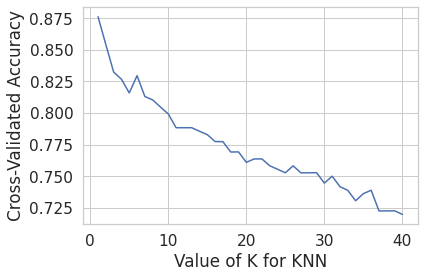

In [51]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

##### The accuracy value is high for low values of k (less than 5) and it descreases as we increase values of k

# Using KNN with k=1 for model classification 

##### We had identified the k=1 is best parameter with GridSearch so using k as 1

In [52]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.8913043478260869


##### The accuracy is 0.89 which is 89% after applying sampling. But we will use confusion matrix and classification report to further check our accuracy

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
confusion_matrix

array([[12,  0,  4,  0,  0,  0],
       [ 3, 10,  1,  1,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  1,  0, 14]])

In [54]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.75      0.77        16
           2       1.00      0.67      0.80        15
           3       0.75      1.00      0.86        15
           5       0.89      1.00      0.94        16
           6       1.00      1.00      1.00        15
           7       1.00      0.93      0.97        15

    accuracy                           0.89        92
   macro avg       0.91      0.89      0.89        92
weighted avg       0.91      0.89      0.89        92



##### We could see the precision and recall values are more than 0.75 for all the 7 types which is very decent score. 